# On human motion prediction using variational recurrent neural networks (vae-lstm)

Human motion prediction using variational recurrent neural networks (`vae-lstm`) is a classical deep learning method to predict skeletal-based human motions on a model combining variational autoencoders (VAE) and long short-term memory (LSTM). With the goal of learning time-dependent representations that perform tasks such as short-term motion prediction and long-term human motion synthesis, `vae-lstm` trains a sequence-to-sequence model to deal with the challenge.

## Setup

1. Get the raw files
2. Open this tutorial

In [ ]:
# change the working directory to the source code folder
import os
os.chdir("../../../../src")
os.getcwd()

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from algorithm.vae_lstm.models import VAE_LSTM
from algorithm.vae_lstm.data_utils import MotionDataset

In [2]:
def fetch_amass(root_dir: str):
    data_lst = []
    for r, d, f in os.walk(root_dir):
        if d == []:
            for file in f:
                data_lst.append(r + "/" + file)
    return data_lst

def transform(sample):
    transformed_sample = {}
    for field in ["trans", "poses", "root_orient"]:
        transformed_sample[field] = np.swapaxes(sample[field][:60], 0,1) # cut to 7200 frame
    return transformed_sample

In [3]:
AMASS_Dataset = MotionDataset("/home/vince/Downloads/HDM05", fetch=fetch_amass, transform=transform)
amass_dataloader = DataLoader(AMASS_Dataset, batch_size=25, shuffle=True, num_workers=0)

In [4]:
model = VAE_LSTM(joint_size=57, input_frame=60)

No handles with labels found to put in legend.


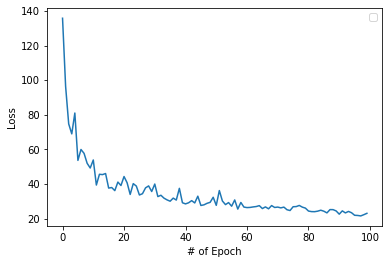

100%|██████████| 100/100 [03:13<00:00,  1.93s/it]

Final loss: 23.046554565429688


In [5]:
model.train(lr=1e-5, num_epochs=100, train_loader=amass_dataloader)

In [6]:
torch.save(model.state_dict(), "/home/vince/Downloads/VAE_LSTM.pt")